In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# KNN (K-近邻算法)

K近邻算法利用待分类的点与其他已标签好的点进行距离度量，选出最近的k个点进行投票，例如有如下已标签好的数据：

| 编号 | 特征1 | 特征2 | 标签 |
| :--: | :--: | :--: | :--: |
| 1 | 1 | 3 | A |
| 2 | 5 | 8 | A |
| 3 | 7 | 6 | B |
| 4 | 8 | 8 | B |
| 5 | 10 | 8 | B |

这时，有了一个数据data，他的特征1和特征2分别为4和6，我们先将此data对每个点进行距离计算，距离计算一般使用欧拉距离
$$\sqrt{\sum_{i=0}^{n}(a_i-b_i)^2}$$
于是乎，经过距离计算，数据data与个点的距离分别为：  

| 编号 | 标签 | 距离 |
| :--: | :--: | :--: |
| 1 | A | 4.2 |
| 2 | A  |2.2 |
| 3 | B | 3.0 |
| 4 | B | 4.5 |
| 5 | B | 6.3 |

我们取k=3进行计算，也就是取前三个最近的进行投票，最近的三个分别为编号1、2、3，其类别分别为A、A、B，其中A最多，故我们预测数据data的类别为A

### 优缺点

优点：准确性高、对离群值不敏感  
缺点：所需计算资源多(每次预测都需要对所有已标签数据遍历)

### 示例
1. 约会配对推荐系统  
小美从约会网站上收集三个男生的特征，如下所示：
 - 一年飞行的里程数
 - 打游戏时间的百分比
 - 一周吃冰淇淋的量  
 
我们将已标签数据放在```./datasets/datingSet.txt```,待测试数据放在```./datasets/datingTestSet.txt```  
首先，先读取已标签数据和待测试数据

In [2]:
def file2matrix(filename, num_of_features ,d):
    file = open(filename,'r')
    lines=file.readlines()
    numberOfLines = len(lines)
    matrix=np.zeros((numberOfLines,num_of_features))
    classLabelVector = ['' for _ in range(numberOfLines)]
    for idx, line in enumerate(lines):
        line = line.strip()
        *features, label = line.split('\t')
        matrix[idx] = features
        classLabelVector[idx] = label
    return matrix, classLabelVector
d={
    'didntLike':1,
    'smallDoses':2,
    'largeDoses':3
}
datingDataMat, datingDataLabel = file2matrix('./datasets/datingSet.txt',3,d)
datingTestMat, datingTestLabel = file2matrix('./datasets/datingTestSet.txt',3,d)

由于有三个特征，我们将已标签数据以三维的方式投影出来，看各类的彼此距离分布

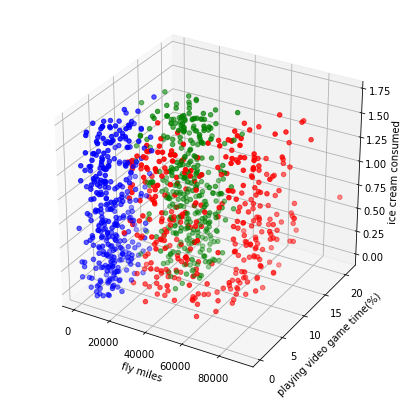

In [3]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
colors={
    'didntLike':'r',
    'smallDoses':'b',
    'largeDoses':'g'
}
ax.scatter(datingDataMat[:,0], datingDataMat[:,1],datingDataMat[:,2],c=list(map(colors.__getitem__,datingDataLabel)))

ax.set_xlabel('fly miles')
ax.set_ylabel('playing video game time(%)')
ax.set_zlabel('ice cream consumed')


plt.show()

由于不同特征之间取值范围不同，例如飞行里程数的取值范围通常大于打游戏的取值范围，这就造成了飞行里程数支配了分类结果，所以我们先将所有特征数据标准化，将取值限缩在0到1之间，标准化公式如下所示：
$$\frac{v-min}{max-min}$$

In [4]:
def normalize(data):
    mn = np.min(data,axis=0)
    mx = np.max(data,axis=0)
    return (data-mn)/np.where(np.equal(mx-mn,0),1e-15,mx-mn)

NormdatingDataMat = normalize(datingDataMat)
NormdatingTestMat = normalize(datingTestMat)

In [6]:
from collections import Counter
K=7
def distance(a,b):
    s=0
    for i in range(len(a)):
        s+=np.square(a[i]-b[i])
            
    return np.sqrt(s)

def classify(voter,y):
    vote_count=Counter(voter)
    return int(not (vote_count.most_common(1)[0][0] == int(y)))

def test(xs,ys,vals,y_vals):
    errCount=0
    
    for x,y in zip(xs,ys):
        dis_vec=[]
        for v,y_v in zip(vals,y_vals):
            dis = [distance(x,v),y_v]
            dis_vec.append(dis)
        dis_vec=sorted(dis_vec,key=lambda x:x[0])
        errCount+=classify(np.array(dis_vec)[:K,1], y)
    return errCount/len(xs)


'Err rate: %f' % test(NormdatingTestMat, datingTestLabel, NormdatingDataMat,list(map(d.__getitem__,datingDataLabel)))

'Err rate: 0.038000'